In [1]:
import mesa

from epstein_network_civil_violence.agent import Inhabitant, Police
from epstein_network_civil_violence.model import EpsteinNetworkCivilViolence
import numpy as np
import matplotlib.pyplot as plt

C:\Users\liaojw\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# original model server(figure 1,2,3,4)



COP_COLOR = "#000000"
AGENT_QUIET_COLOR = "#648FFF"
AGENT_REBEL_COLOR = "#FE6100"
JAIL_COLOR = "#808080"
JAIL_SHAPE = "rect"


def citizen_cop_portrayal(agent):
    if agent is None:
        return

    portrayal = {
        "Shape": "circle",
        "x": agent.pos[0],
        "y": agent.pos[1],
        "Filled": "true",
    }

    if type(agent) is Inhabitant:
        color = (
            AGENT_QUIET_COLOR if agent.condition == "Quiescent" else AGENT_REBEL_COLOR
        )
        color = JAIL_COLOR if agent.jail_sentence else color
        shape = JAIL_SHAPE if agent.jail_sentence else "circle"
        portrayal["Color"] = color
        portrayal["Shape"] = shape
        if shape == "rect":
            portrayal["w"] = 0.9
            portrayal["h"] = 0.9
        else:
            portrayal["r"] = 0.5
            portrayal["Filled"] = "false"
        portrayal["Layer"] = 0

    elif type(agent) is Police:
        portrayal["Color"] = COP_COLOR
        portrayal["r"] = 0.9
        portrayal["Layer"] = 1

    return portrayal


model_params = {
    "height": 40,
    "width": 40,
    "citizen_density": mesa.visualization.Slider(
        "Initial Agent Density", 0.7, 0.0, 0.9, 0.1
    ),
    "cop_density": mesa.visualization.Slider(
        "Initial Cop Density", 0.05, 0.0, 0.1, 0.01
    ),
    "citizen_vision": mesa.visualization.Slider("Citizen Vision", 6, 1, 10, 1),
    "cop_vision": mesa.visualization.Slider("Cop Vision", 5, 1, 10, 1),
    "legitimacy": mesa.visualization.Slider(
        "Government Legitimacy", 0.82, 0.0, 1, 0.01
    ),
    "max_jail_term": mesa.visualization.Slider("Max Jail Term", 30, 0, 50, 1),
    "alpha": mesa.visualization.Slider("Alpha", 0.1, 0.0, 0.5, 0.1),
    "jail_factor": mesa.visualization.Slider("Jail Factor", 1.1, 1.0, 1.5, 0.1),
    "impact_chance": mesa.visualization.Slider("Impact Chance", 0.5, 0.1, 1.0, 0.1),
    "legitimacy_impact": mesa.visualization.Slider("Legitimacy Impact", 0.01, 0.0, 0.05, 0.01),
    "incitation_threshold": mesa.visualization.Slider("Incitation Threshold", 10, 0.0, 100, 10),
}
canvas_element = mesa.visualization.CanvasGrid(citizen_cop_portrayal, 40, 40, 480, 480)
chart = mesa.visualization.ChartModule(
    [
        {"Label": "Quiescent", "Color": "#648FFF"},
        {"Label": "Active", "Color": "#FE6100"},
        {"Label": "Jailed", "Color": "#808080"},
    ],
    data_collector_name="datacollector",
)
server = mesa.visualization.ModularServer(
    EpsteinNetworkCivilViolence,
    [
        canvas_element,
        chart,
    ],
    "Epstein Network Civil Violence",
    model_params,
)

server.launch()

Interface starting at http://127.0.0.1:8521
Socket opened!
{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}
{"type":"get_step","step":7}
{"type":"get_step","step":8}
{"type":"get_step","step":9}
{"type":"get_step","step":10}
{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}
{"type":"get_step","step":7}
{"type":"get_step","step":8}
{"type":"get_step","step":9}
{"type":"get_step","step":10}
{"type":"get_step","step":11}
{"type":"get_step","step":12}
{"type":"get_step","step":13}
{"type":"get_step","step":14}
{"type":"get_step","step":15}
{"type":"get_step","step":16}
{"type":"get_step","step":17}
{"type":"ge

In [2]:
# server for Citizen grievance_intensity(figure 1,2)

# from epstein_network_civil_violence.epstein_civil_violence.agent import Cop
COP_COLOR = "#000000"
def citizen_grievance_portrayal(agent):
    if agent is None:
        return

    portrayal = {
        "Shape": "circle",
        "x": agent.pos[0],
        "y": agent.pos[1],
        "Filled": "true",
    }

    if type(agent) is Inhabitant:
        # Adjust color based on level of grievance; lower grievance closer to white
        grievance_intensity = int((1 - agent.grievance) * 255)  # Convert grievance level to color intensity
        color = f'#FF{grievance_intensity:02X}{grievance_intensity:02X}'  # Generate color code
        shape = "circle"
        
        portrayal["Color"] = color
        portrayal["Shape"] = shape
        portrayal["r"] = 0.5  
        portrayal["Filled"] = "true"
        portrayal["Layer"] = 0

    elif type(agent) is Police:
        portrayal["Color"] = COP_COLOR
        portrayal["r"] = 0.9
        portrayal["Layer"] = 1

    return portrayal

model_params = {
    "height": 40,
    "width": 40,
    "citizen_density": mesa.visualization.Slider(
        "Initial Agent Density", 0.7, 0.0, 0.9, 0.1
    ),
    "cop_density": mesa.visualization.Slider(
        "Initial Cop Density", 0.05, 0.0, 0.1, 0.01
    ),
    "citizen_vision": mesa.visualization.Slider("Citizen Vision", 6, 1, 10, 1),
    "cop_vision": mesa.visualization.Slider("Cop Vision", 5, 1, 10, 1),
    "legitimacy": mesa.visualization.Slider(
        "Government Legitimacy", 0.82, 0.0, 1, 0.01
    ),
    "max_jail_term": mesa.visualization.Slider("Max Jail Term", 30, 0, 50, 1),
    "alpha": mesa.visualization.Slider("Alpha", 0.1, 0.0, 0.5, 0.1),
    "jail_factor": mesa.visualization.Slider("Jail Factor", 1.1, 1.0, 1.5, 0.1),
    "impact_chance": mesa.visualization.Slider("Impact Chance", 0.5, 0.1, 1.0, 0.1),
    "legitimacy_impact": mesa.visualization.Slider("Legitimacy Impact", 0.01, 0.0, 0.05, 0.01),
    "incitation_threshold": mesa.visualization.Slider("Incitation Threshold", 10, 0.0, 100, 10),
}
canvas_element = mesa.visualization.CanvasGrid(citizen_grievance_portrayal, 40, 40, 480, 480)
chart = mesa.visualization.ChartModule(
    [
        {"Label": "Active", "Color": "#FE6100"},
    ],
    data_collector_name="datacollector",
)
server = mesa.visualization.ModularServer(
    EpsteinNetworkCivilViolence,
    [
        canvas_element,
        chart,
    ],
    "Epstein Network Civil Violence",
    model_params,
)

server.launch()

Interface starting at http://127.0.0.1:8521
Socket opened!
{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}
{"type":"get_step","step":7}
{"type":"get_step","step":8}
{"type":"get_step","step":9}
{"type":"get_step","step":10}
{"type":"get_step","step":11}
{"type":"get_step","step":12}
{"type":"get_step","step":13}
{"type":"get_step","step":14}
{"type":"get_step","step":15}
{"type":"get_step","step":16}
{"type":"get_step","step":17}
{"type":"get_step","step":18}
{"type":"get_step","step":19}
{"type":"get_step","step":20}
{"type":"get_step","step":21}
{"type":"get_step","step":22}
{"type":"get_step","step":23}
{"type":"get_step","step":24}
{"type":"get_step","step":25}
{"type":"get_step","step":26}
{"type":"get_step","step":27}
{"type":"get_step","step":28}
{"type":"get_step","step":29}
{"type":"get_step","step":30}
{"type":"get_step","step":31}
{"t

: 

In [ ]:
server.launch()

Interface starting at http://127.0.0.1:8521
Socket opened!
{"type":"reset"}
{"type":"get_step","step":1}
{"type":"get_step","step":2}
{"type":"get_step","step":3}
{"type":"get_step","step":4}
{"type":"get_step","step":5}
{"type":"get_step","step":6}
{"type":"get_step","step":7}
{"type":"get_step","step":8}
{"type":"get_step","step":9}
{"type":"get_step","step":10}
{"type":"get_step","step":11}
{"type":"get_step","step":12}
{"type":"get_step","step":13}
{"type":"get_step","step":14}
{"type":"get_step","step":15}
{"type":"get_step","step":16}
{"type":"get_step","step":17}
{"type":"get_step","step":18}
{"type":"get_step","step":19}
{"type":"get_step","step":20}
{"type":"get_step","step":21}
{"type":"get_step","step":22}
{"type":"get_step","step":23}
{"type":"get_step","step":24}
{"type":"get_step","step":25}
{"type":"get_step","step":26}
{"type":"get_step","step":27}
{"type":"get_step","step":28}
{"type":"get_step","step":29}
{"type":"get_step","step":30}
{"type":"get_step","step":31}
{"t

: 

Active Count: 78
Active Count: 107
Active Count: 137
Active Count: 107
Active Count: 117
Active Count: 103
Active Count: 104
Active Count: 116
Active Count: 109
Active Count: 108
Active Count: 94
Outburst ends at step 21
Active Count: 69
Active Count: 33
Active Count: 31
Active Count: 32
Active Count: 30
Active Count: 42
Active Count: 43
Active Count: 50
Active Count: 74
Active Count: 79
Active Count: 52
Active Count: 73
Active Count: 72
Active Count: 68
Active Count: 68
Active Count: 82
Active Count: 72
Active Count: 66
Active Count: 68
Active Count: 56
Active Count: 51
Active Count: 65
Active Count: 64
Active Count: 73
Active Count: 75
Active Count: 64
Active Count: 82
Active Count: 76
Active Count: 78
Active Count: 70
Active Count: 71
Active Count: 61
Active Count: 60
Active Count: 57
Active Count: 65
Active Count: 77
Active Count: 74
Active Count: 52
Active Count: 75
Active Count: 95
Active Count: 90
Active Count: 84
Active Count: 66
Active Count: 63
Active Count: 60
Active Count: 

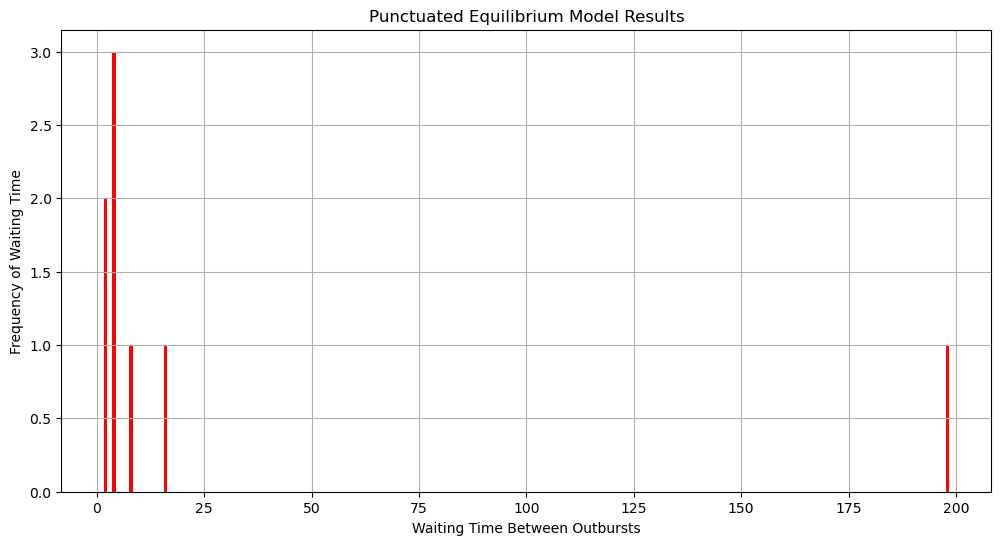

In [ ]:
# figure5

model = EpsteinNetworkCivilViolence(
    width=20,
    height=20,
    citizen_density=0.7,
    cop_density=0.06,
    citizen_vision=3,
    cop_vision=3,
    legitimacy=0.8,
    max_jail_term=15,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
    alpha=0.1,
    jail_factor=1.1,
    impact_chance=0.5,
    legitimacy_impact=0.01,
    incitation_threshold=10
)
for _ in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()

# Assume model has been run and waiting_times have been collected as follows:
waiting_times = model.waiting_times

# Convert list to numpy array for easier manipulation
waiting_times_array = np.array(waiting_times)

# Get unique waiting times and their counts
unique_times, counts = np.unique(waiting_times_array, return_counts=True)

# Plotting the frequencies against the waiting times
plt.figure(figsize=(12, 6))
plt.bar(unique_times, counts, color='red')
plt.xlabel('Waiting Time Between Outbursts')
plt.ylabel('Frequency of Waiting Time')
plt.title('Punctuated Equilibrium Model Results')
plt.grid(True)
plt.show()

In [ ]:
# figure6
from sklearn.linear_model import LinearRegression

# Assuming the simulation model has already been run, and waiting_times have been collected
simulation_model = EpsteinNetworkCivilViolence(
    width=40,
    height=40,
    citizen_density=0.7,
    cop_density=0.04,
    citizen_vision=2,
    cop_vision=2,
    legitimacy=0.8,
    max_jail_term=15,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
    alpha=0.1,
    jail_factor=1.1,
    impact_chance=0.5,
    legitimacy_impact=0.01,
    incitation_threshold=10
)

for _ in range(1000):
    simulation_model.step()

waiting_times = simulation_model.waiting_times

# Convert the list to a numpy array for easier manipulation
waiting_times_array = np.array(waiting_times)

# Obtain unique waiting times and their counts
unique_times, counts = np.unique(waiting_times_array, return_counts=True)

# Log-transform the counts to prepare for regression analysis
log_freq = np.log(counts)

# Prepare data for linear regression
X = unique_times.reshape(-1, 1)
y = log_freq.reshape(-1, 1)

# Perform linear regression
regression_model = LinearRegression()
regression_model.fit(X, y)

# Get the regression line for plotting
line = regression_model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(unique_times, log_freq, color='red', label='Logged Frequency Data')
plt.plot(unique_times, line, color='blue', label=f'y = {regression_model.coef_[0][0]:.4f}x + {regression_model.intercept_[0]:.4f}, $R^2$ = {regression_model.score(X, y):.4f}')
plt.xlabel('Waiting Time Between Outbursts')
plt.ylabel('Log Frequency')
plt.title('Punctuated Equilibrium Model Results - Log Transformed Data')
plt.legend()
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'sklearn'

Active Count: 237
Active Count: 194
Active Count: 173
Active Count: 147
Active Count: 149
Active Count: 111
Active Count: 98
Outburst ends at step 13
Active Count: 99
Active Count: 104
Outburst starts, wait time recorded: 4
Active Count: 101
Active Count: 95
Outburst ends at step 21
Active Count: 99
Active Count: 98
Active Count: 99
Active Count: 102
Outburst starts, wait time recorded: 8
Active Count: 94
Outburst ends at step 31
Active Count: 95
Active Count: 91
Active Count: 84
Active Count: 72
Active Count: 86
Active Count: 94
Active Count: 104
Outburst starts, wait time recorded: 14
Active Count: 97
Outburst ends at step 47
Active Count: 91
Active Count: 77
Active Count: 84
Active Count: 103
Outburst starts, wait time recorded: 8
Active Count: 103
Active Count: 91
Outburst ends at step 59
Active Count: 96
Active Count: 91
Active Count: 77
Active Count: 82
Active Count: 82
Active Count: 93
Active Count: 88
Active Count: 80
Active Count: 91
Active Count: 100
Outburst starts, wait tim

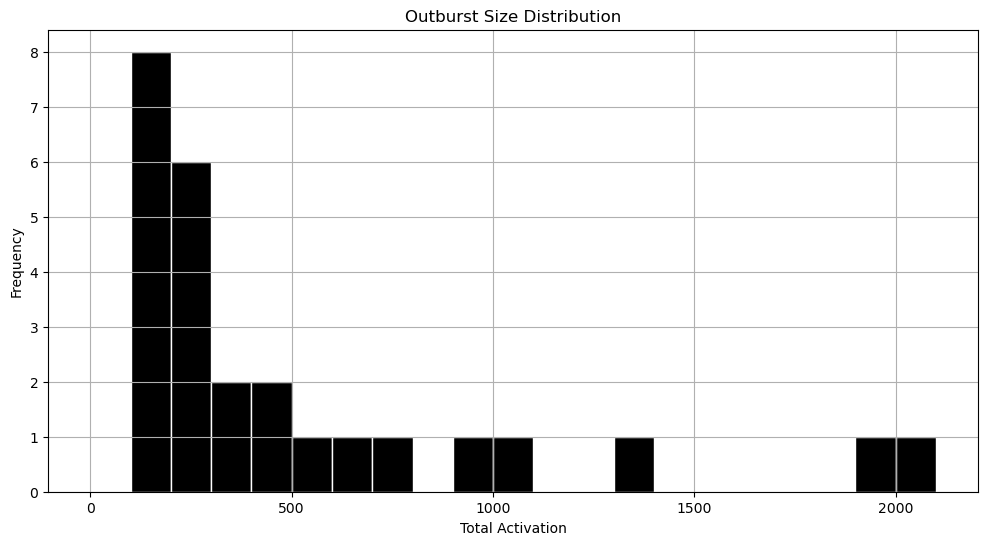

In [ ]:
# figure7
model = EpsteinNetworkCivilViolence(
    width=40,
    height=40,
    citizen_density=0.7,
    cop_density=0.04,
    citizen_vision=2,
    cop_vision=2,
    legitimacy=0.8,
    max_jail_term=15,
    active_threshold=0.1,
    arrest_prob_constant=2.3,
    movement=True,
    max_iters=1000,
    alpha=0.1,
    jail_factor=1.1,
    impact_chance=0.5,
    legitimacy_impact=0.01,
    incitation_threshold=10
    
)

for _ in range(1000):
    model.step()

# Data for plotting
outburst_sizes = model.outburst_sizes

# Define the bins for the histogram
bins = range(0, max(outburst_sizes) + 100, 100)  # Adjust bin size and range as needed

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(outburst_sizes, bins=bins, color='black', edgecolor='white')
plt.xlabel('Total Activation')
plt.ylabel('Frequency')
plt.title('Outburst Size Distribution')
plt.grid(True)
plt.show()

Active Count: 181
Active Count: 195
Active Count: 146
Active Count: 105
Active Count: 103
Active Count: 71
Outburst ends at step 11
Active Count: 61
Active Count: 62
Active Count: 57
Active Count: 49
Active Count: 56
Active Count: 50
Active Count: 51
Active Count: 44
Active Count: 53
Active Count: 53
Active Count: 52
Active Count: 49
Active Count: 58
Active Count: 62
Active Count: 53
Active Count: 43
Active Count: 54
Active Count: 47
Active Count: 52
Active Count: 49
Active Count: 43
Active Count: 49
Active Count: 52
Active Count: 49
Active Count: 57
Active Count: 63
Active Count: 64
Active Count: 43
Active Count: 60
Active Count: 48
Active Count: 60
Active Count: 61
Active Count: 36
Active Count: 34
Active Count: 49
Active Count: 55
Active Count: 42
Active Count: 44
Active Count: 55
Active Count: 51
Active Count: 53
Active Count: 45
Active Count: 46
Active Count: 41
Active Count: 50
Active Count: 46
Active Count: 51
Active Count: 61
Active Count: 63
Active Count: 54
Active Count: 52
A

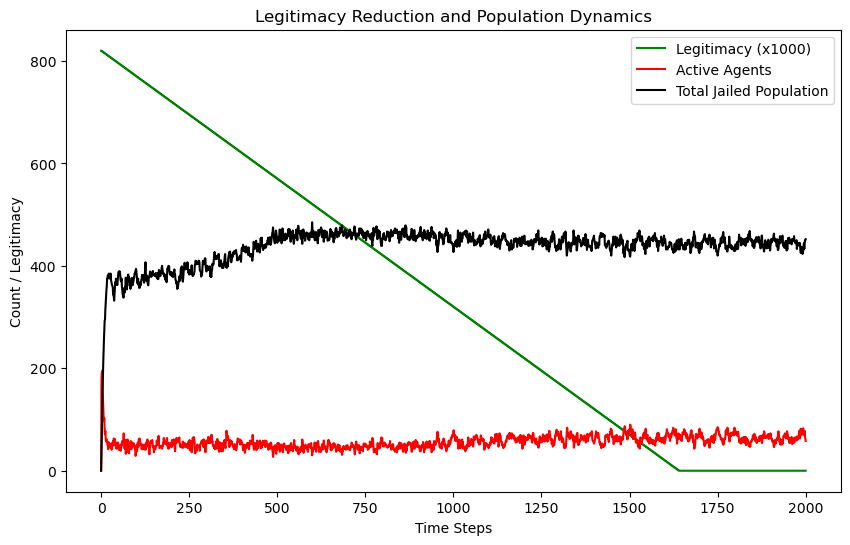

In [ ]:
# Figure9&10
model = EpsteinNetworkCivilViolence(
    width=40, height=40, citizen_density=0.7, cop_density=0.04,
    citizen_vision=2, cop_vision=2, legitimacy=0.82, max_jail_term=30,
    active_threshold=0.1, arrest_prob_constant=2.3, movement=True, max_iters=1000, legitimacy_mode='gradual', cop_density_mode='constant',alpha=0.1,
    jail_factor=1.1, impact_chance=0.5, legitimacy_impact=0.01, incitation_threshold=10
)
for _ in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()

# plot
plt.figure(figsize=(10, 6))
plt.plot(data['Legitimacy']*1000, label='Legitimacy (x1000)', color='green')
plt.plot(data['Active'], label='Active Agents', color='red')
plt.plot(data['Jailed'], label='Total Jailed Population', color='black')
plt.xlabel('Time Steps')
plt.ylabel('Count / Legitimacy')
plt.title('Legitimacy Reduction and Population Dynamics')
plt.legend()
plt.show()

Active Count: 403
Active Count: 369
Active Count: 337
Active Count: 290
Active Count: 271
Active Count: 221
Active Count: 187
Active Count: 179
Active Count: 161
Active Count: 170
Active Count: 168
Active Count: 179
Active Count: 169
Active Count: 167
Active Count: 165
Active Count: 162
Active Count: 170
Active Count: 165
Active Count: 165
Active Count: 169
Active Count: 174
Active Count: 183
Active Count: 170
Active Count: 174
Active Count: 162
Active Count: 180
Active Count: 152
Active Count: 150
Active Count: 162
Active Count: 176
Active Count: 163
Active Count: 162
Active Count: 185
Active Count: 159
Active Count: 171
Active Count: 196
Active Count: 166
Active Count: 167
Active Count: 161
Active Count: 151
Active Count: 154
Active Count: 161
Active Count: 165
Active Count: 166
Active Count: 178
Active Count: 192
Active Count: 174
Active Count: 193
Active Count: 192
Active Count: 191
Active Count: 211
Active Count: 190
Active Count: 174
Active Count: 167
Active Count: 164
Active Cou

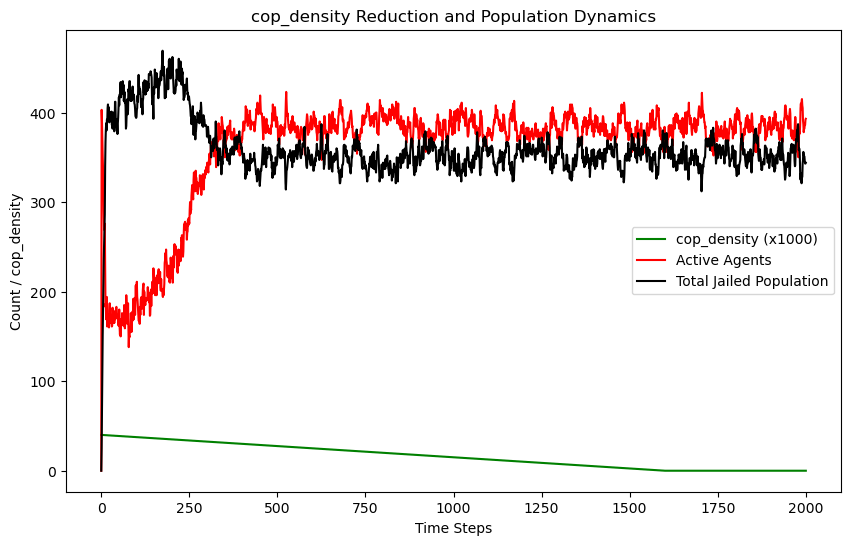

In [ ]:
# Figure11
model = EpsteinNetworkCivilViolence(
    width=40, height=40, citizen_density=0.7, cop_density=0.04,
    citizen_vision=2, cop_vision=2, legitimacy=0.7, max_jail_term=15,
    active_threshold=0.1, arrest_prob_constant=2.3, movement=True, max_iters=1000, legitimacy_mode='constant', cop_density_mode='gradual', alpha=0.1,
    jail_factor=1.1, impact_chance=0.5, legitimacy_impact=0.01, incitation_threshold=10
)
for _ in range(1000):
    model.step()

data = model.datacollector.get_model_vars_dataframe()

# plot
plt.figure(figsize=(10, 6))
plt.plot(data['Cop_Density']*1000, label='cop_density (x1000)', color='green')
plt.plot(data['Active'], label='Active Agents', color='red')
plt.plot(data['Jailed'], label='Total Jailed Population', color='black')
plt.xlabel('Time Steps')
plt.ylabel('Count / cop_density')
plt.title('cop_density Reduction and Population Dynamics')
plt.legend()
plt.show()